In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

%matplotlib inline
plt.style.use('seaborn-white')

## 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

## Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [4]:
np.random.seed(0)
c1 = np.append(np.random.normal(0, 0.01, (20, 50)), np.full((20, 1), 1), axis=1)
c2 = np.append(np.random.normal(0.3, 0.01, (20, 50)), np.full((20, 1), 2), axis=1)
c3 = np.append(np.random.normal(-0.3, 0.01, (20, 50)), np.full((20, 1), 3), axis=1)

df = pd.DataFrame(np.vstack((c1,c2,c3)))

In [7]:
print(df.head())

         0         1         2         3         4         5         6   \
0  0.017641  0.004002  0.009787  0.022409  0.018676 -0.009773  0.009501   
1 -0.008955  0.003869 -0.005108 -0.011806 -0.000282  0.004283  0.000665   
2  0.018832 -0.013478 -0.012705  0.009694 -0.011731  0.019436 -0.004136   
3 -0.000682  0.017133 -0.007448 -0.008264 -0.000985 -0.006635  0.011266   
4 -0.003692 -0.002394  0.010997  0.006553  0.006401 -0.016170 -0.000243   

         7         8         9   ...        41        42        43        44  \
0 -0.001514 -0.001032  0.004106  ... -0.014200 -0.017063  0.019508 -0.005097   
1  0.003025 -0.006343 -0.003627  ...  0.012224  0.002083  0.009766  0.003564   
2 -0.007475  0.019229  0.014805  ...  0.004394  0.001667  0.006350  0.023831   
3 -0.010799 -0.011475 -0.004378  ...  0.002671 -0.000393 -0.011681  0.005233   
4 -0.007380  0.002799 -0.000982  ... -0.003973 -0.001329 -0.002978 -0.003090   

         45        46        47        48        49   50  
0 -0.0043

## (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.iloc[:,0:50])
df_pca = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])
df_pca['labels'] = df[[50]]
df_pca.labels = df_pca.labels.astype(int)

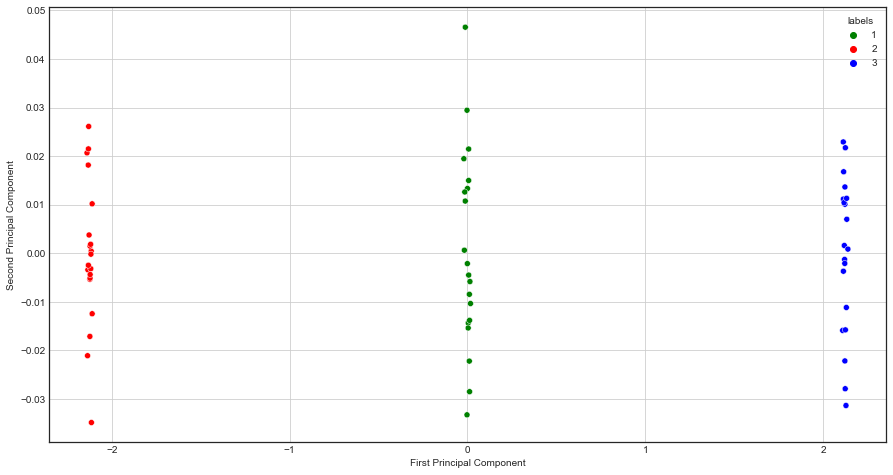

In [11]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x="PC1", y="PC2", hue="labels", palette={1:'green', 2:'red', 3:'blue'}, data=df_pca)
plt.grid()
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

## (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [15]:
km = KMeans(n_clusters=3, n_init=50, random_state=0)
km.fit(df.iloc[:,:50])

KMeans(n_clusters=3, n_init=50, random_state=0)

In [16]:
print(km.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
pd.Series(km.labels_).value_counts()

0    20
1    20
2    20
dtype: int64

The labels are in sequential ordering, ensuring that the class labels are correctly classified.

## (d) Perform K-means clustering of the observations with K = 2. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [18]:
km2 = KMeans(n_clusters=2, n_init=50, random_state=0)
km2.fit(df.iloc[:,:50])

KMeans(n_clusters=2, n_init=50, random_state=0)

In [19]:
print(km2.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
pd.Series(km2.labels_).value_counts()

0    40
1    20
dtype: int64

KeyError: (slice(None, None, None), 0)

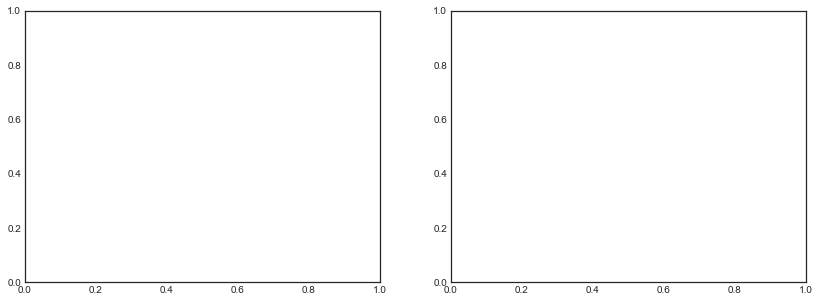

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(df[:,0], df[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(df[:,0], df[:,1], s=40, c=km.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);